In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import h5py
import timeit
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN

%alias_magic t timeit

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)


image = h5py.File('image_x_y.h5', 'r')
image.keys()


Created `%t` as an alias for `%timeit`.
Created `%%t` as an alias for `%%timeit`.


<KeysViewHDF5 ['X', 'Y', 'halo_mass']>

In [2]:
X = image.get('X')
X_tot = np.array(X)
print(X)
Y = image.get('Y')
Y_tot = np.array(Y)
print(Y)

<HDF5 dataset "X": shape (1001, 1001, 1001, 3), type "<f8">
<HDF5 dataset "Y": shape (1001, 1001, 1001), type "<f8">


In [3]:
#X and Y matrices
print(X_tot)
print(Y_tot)

[[[[  72.95633 -200.96982  219.74171]
   [   0.         0.         0.     ]
   [   0.         0.         0.     ]
   ...
   [   0.         0.         0.     ]
   [   0.         0.         0.     ]
   [   0.         0.         0.     ]]

  [[   0.         0.         0.     ]
   [   0.         0.         0.     ]
   [   0.         0.         0.     ]
   ...
   [   0.         0.         0.     ]
   [   0.         0.         0.     ]
   [   0.         0.         0.     ]]

  [[   0.         0.         0.     ]
   [   0.         0.         0.     ]
   [   0.         0.         0.     ]
   ...
   [   0.         0.         0.     ]
   [   0.         0.         0.     ]
   [   0.         0.         0.     ]]

  ...

  [[   0.         0.         0.     ]
   [   0.         0.         0.     ]
   [   0.         0.         0.     ]
   ...
   [   0.         0.         0.     ]
   [   0.         0.         0.     ]
   [   0.         0.         0.     ]]

  [[   0.         0.         0.     ]
   [   

## Picking the train and test boxes from data

**- We use 20 random small cells of our main box as the train set and all the remaining as the test set of our data.**

In [42]:
X_train = X_tot[:80,:80,:80,:]

Y_train = Y_tot[:80,:80,:80]

X_test = X_tot[80:,80:,80:,:]

Y_test = Y_tot[80:,80:,80:]

TypeError: Invalid shape (80, 80, 80) for image data

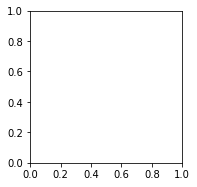

In [43]:
fig = plt.figure()

# show the reference image
ax1 = fig.add_subplot(121)
ax1.imshow(Y_train, cmap=plt.cm.BrBG, interpolation='nearest', origin='lower')

# show the 3D rotated projection
#ax2 = fig.add_subplot(122, projection='3d')
#cset = ax2.contourf(X, Y, data, 100, zdir='z', offset=0.5, cmap=cm.BrBG)

#ax2.set_zlim((0.,1.))

plt.colorbar(cset)
plt.show()

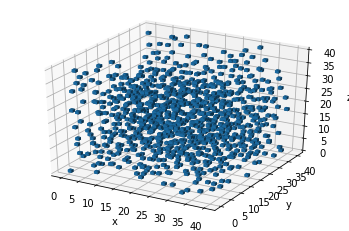

In [48]:
from mpl_toolkits.mplot3d import Axes3D

def make_ax(grid=False):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.grid(grid)
    return ax


ax = make_ax(True)
ax.voxels(Y_train[:40,:40,:40], cmap ='hot')
plt.show()

# Implementing the CNN model

In [45]:
import tensorflow as tf
from tensorflow import keras

new_model = keras.models.Sequential()

new_model.add(keras.layers.Conv3D(32, (3,3,1)  , activation = 'relu' , padding = 'same' , input_shape=(80,80,80,3)))
new_model.add(keras.layers.Conv3D(32, (3,3,1) , padding = 'same' , activation = 'relu' ))

new_model.add(keras.layers.MaxPooling3D((2,2,1) , padding = 'same'))
new_model.add(keras.layers.Conv3D(64, (3,3,1) , padding = 'same' , activation = 'relu' ))
new_model.add(keras.layers.Conv3D(64, (3,3,1) , padding = 'same' , activation = 'relu' ))
new_model.add(keras.layers.MaxPooling3D((2,2,1) , padding = 'same'))
new_model.add(keras.layers.Dropout(0.25))
new_model.add(keras.layers.Flatten())

new_model.add(keras.layers.Dense(120 , activation = 'relu'))
new_model.add(keras.layers.Dense(60 , activation = 'relu'))
new_model.add(keras.layers.Dense(1, activation = 'linear'))
              
new_model.compile(optimizer = 'adam' , loss = 'mean_squared_error' , metrics = ['accuracy' ])



In [46]:
X_train1 = X_train.reshape(-1,80, 80, 3)

#X_test1 = X_test.reshape(-1,28, , 1)

In [47]:
history = new_model.fit(X_train1 , Y_train, epochs = 20 , batch_size = 5000, validation_split= .25)

ValueError: Error when checking input: expected conv3d_8_input to have 5 dimensions, but got array with shape (80, 80, 80, 3)

In [ ]:
#Implementing train and test sets:
import random
#box size:
tl = 5
for num in range(30):
    
    #place of the box:
    dx = random.randint(0,12)
    dy = random.randint(0,12)
    dz = random.randint(0,12)
    
    print('dx:', dx, ' dy:' , dy, ' dz:', dz)
    t = d[ d[:,2] > dx * tl ]
    t = t[ t[:,2] < (dx+1)*tl ]
    t = t[ t[:,3] > (dy)*tl ]
    t = t[ t[:,3] < (dy+1)*tl ]
    t = t[ t[:,4] > (dz)*tl ]
    t = t[ t[:,4] < (dz+1)*tl ]

    #Showing the train set:
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')

    # load some test data for demonstration and plotting
    title = 'Particles_distribution_in_space_at_z=127'
    ax.set_title(title)
    p = ax.scatter(t[:,2], t[:,3], t[:,4], s = 0.3, c= t[:,9] , cmap= 'viridis')
    ax.set_xlabel('X Mpc * h^-1')
    ax.set_ylabel('Y Mpc * h^-1')
    ax.set_zlabel('Z Mpc * h^-1')
    cb = fig.colorbar(p)
    cb.set_label('$Halo_Mass$')
    cb.mappable.set_clim([min(t[:,9]),max(t[:,9])])
    plt.show()
    if num ==0:
        train_set = t
    else:
        train_set = np.append(train_set, t, axis = 0)
        
        
col = ['snapnum','phkey','x','y','z','vx','vy','vz','id','In_halo','halo_mass','i','j','k','c']
train_set = pd.DataFrame(train_set, columns = col)
train_set['i'] = train_set['i'].astype(int)
train_set['j'] = train_set['j'].astype(int)
train_set['k'] = train_set['k'].astype(int)
print(len(train_set))
train_set.head(300)


#Now that we have the train set, test set is simply just anything which is not in the training one.
#But we can also use all the data as test set
#test_set = d[d[:,8] is not ]
test_set = data
print(len(test_set))
test_set.head(300)

NotImplementedError: It is not currently possible to manually set the aspect on 3D axes

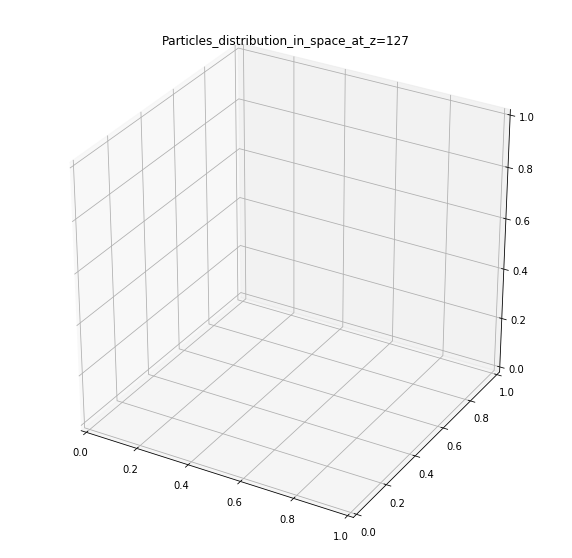

In [26]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# load some test data for demonstration and plotting
title = 'Particles_distribution_in_space_at_z=127'
ax.set_title(title)
p = ax.imshow(Y_train[:10,:10,:10], s = 0.3 , cmap= 'viridis')
ax.set_xlabel('X Mpc * h^-1')
ax.set_ylabel('Y Mpc * h^-1')
ax.set_zlabel('Z Mpc * h^-1')
cb = fig.colorbar(p)
cb.set_label('$Halo_Mass$')
#cb.mappable.set_clim([min(t[:,9]),max(t[:,9])])
plt.show()